In [0]:
import numpy as np

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
np.float32()

0.0

Populating the interactive namespace from numpy and matplotlib


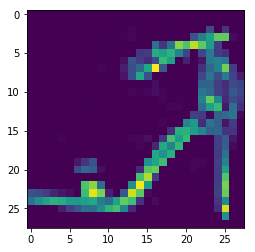

In [7]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(x_train[8])
plt.show()

In [8]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_test.shape)

(10000, 28, 28, 1)


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_data = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True)
#train_data = ImageDataGenerator(rescale=1./255)
val_data = ImageDataGenerator(rescale=1./255)


In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
def create_model():
  
  img_input = layers.Input(shape=(28,28,1))


  x = Conv2D(32,(3,3),activation="relu",data_format='channels_last',padding = 'same')(img_input)
  x = MaxPooling2D(2)(x)


  x = Conv2D(64,3,activation="relu",data_format='channels_last')(x)
  x = MaxPooling2D(2)(x)

  x = Conv2D(128,3,activation="relu",data_format='channels_last')(x)
  x = MaxPooling2D(2)(x)

  x = Flatten()(x)

  x = Dense(1024,activation="relu")(x)

  x = Dense(512,activation="relu")(x)

  x = Dense(256,activation = "relu")(x)

  x = Dropout(0.5)(x)

  output = Dense(10,activation = "softmax")(x)

  model = Model(img_input,output)
  
  return(model)




In [12]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
#for tpu service
import os

resolver = tf.contrib.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.contrib.distribute.initialize_tpu_system(resolver)
strategy = tf.contrib.distribute.TPUStrategy(resolver)

with strategy.scope():
  model = create_model()
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False),
                metrics=['sparse_categorical_accuracy'])

W0820 16:49:18.082167 140027720345472 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0820 16:49:24.000051 140027720345472 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.fit(x_train.astype(np.float32), y_train.astype(np.float32), 
          batch_size=600,
          steps_per_epoch=100,
          epochs=15,
          validation_data=(x_test.astype(np.float64),y_test.astype(np.float64)),
          validation_freq=17)

W0820 16:49:47.483925 140027720345472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_distributed.py:411: Variable.load (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


Epoch 1/15
100/100 [==============================] - 3s 28ms/step - loss: 1.2040 - sparse_categorical_accuracy: 0.7201
Epoch 2/15
100/100 [==============================] - 1s 14ms/step - loss: 0.4192 - sparse_categorical_accuracy: 0.8531
Epoch 3/15
100/100 [==============================] - 1s 14ms/step - loss: 0.3560 - sparse_categorical_accuracy: 0.8752
Epoch 4/15
100/100 [==============================] - 1s 15ms/step - loss: 0.3197 - sparse_categorical_accuracy: 0.8861
Epoch 5/15
100/100 [==============================] - 1s 14ms/step - loss: 0.2974 - sparse_categorical_accuracy: 0.8937
Epoch 6/15
100/100 [==============================] - 1s 14ms/step - loss: 0.2788 - sparse_categorical_accuracy: 0.9007
Epoch 7/15
100/100 [==============================] - 1s 15ms/step - loss: 0.2646 - sparse_categorical_accuracy: 0.9054
Epoch 8/15
100/100 [==============================] - 1s 14ms/step - loss: 0.2498 - sparse_categorical_accuracy: 0.9087
Epoch 9/15
100/100 [====================